In [4]:
import numpy as np 
import pandas as pd 

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (roc_auc_score, precision_recall_curve, average_precision_score)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sys, os
sys.path.append(os.path.abspath(".."))
from src.pipelines.feature_engineering import FeatureBuilder

In [5]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
y = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop(columns=["Churn"])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
dt_pipleine = Pipeline( steps = [
    ("feature_engineering", FeatureBuilder()),
    ("scaler", StandardScaler()),
    ("classifier", DecisionTreeClassifier(random_state=42, max_depth= 6 , min_samples_leaf= 50, class_weight= 'balanced'))
])

In [10]:
dt_pipleine.fit(X_train, y_train)
dt_proba = dt_pipleine.predict_proba(X_test)[:, 1]
print("Decision Tree ROC-AUC:",
      roc_auc_score(y_test, dt_proba))


Decision Tree ROC-AUC: 0.8205417344803534


In [11]:
rf_pipeline = Pipeline(
    steps=[
        ("features", FeatureBuilder()),
        ("scaler", StandardScaler()),
        ("model", RandomForestClassifier(
            n_estimators=300,
            max_depth=None,
            min_samples_leaf=30,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [12]:
rf_pipeline.fit(X_train, y_train)

rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC:",
      roc_auc_score(y_test, rf_proba))


Random Forest ROC-AUC: 0.8339275103980988


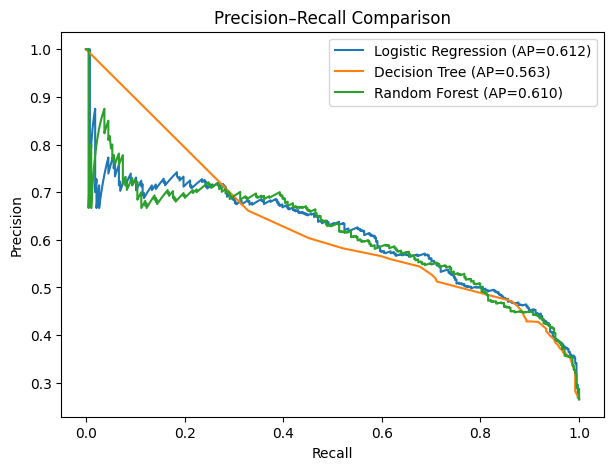

In [14]:
import matplotlib.pyplot as plt
models = {
    "Logistic Regression": np.load("../artifacts/y_proba.npy"),
    "Decision Tree": dt_proba,
    "Random Forest": rf_proba
}

plt.figure(figsize=(7, 5))

for name, proba in models.items():
    precision, recall, _ = precision_recall_curve(y_test, proba)
    ap = average_precision_score(y_test, proba)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Comparison")
plt.legend()
plt.show()
